In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [6]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /Users/yunseokgyu/study/school-class/ml-vocational-class/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:02<00:00, 25.9MB/s]


'ns_book7.csv'

In [7]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [8]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [9]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()

In [10]:
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [11]:

line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

/var/folders/b8/ddg81r2x44g_7wx0yxbk2b2r0000gn/T/ipykernel_35749/1164434814.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


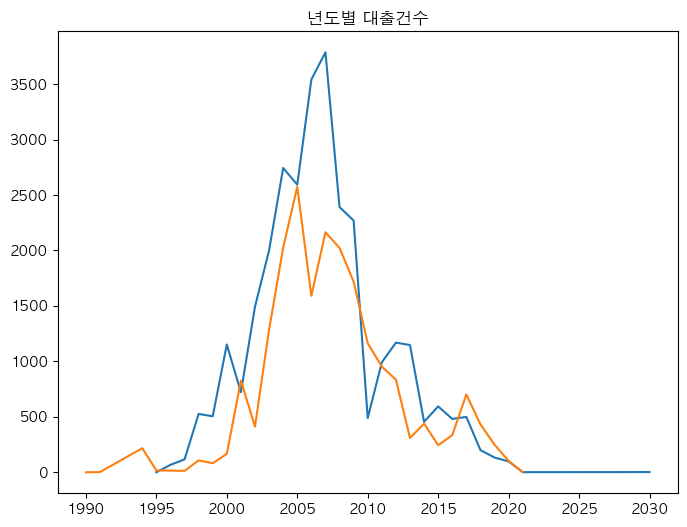

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('년도별 대출건수')
fig.show()

/var/folders/b8/ddg81r2x44g_7wx0yxbk2b2r0000gn/T/ipykernel_35749/1746861815.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


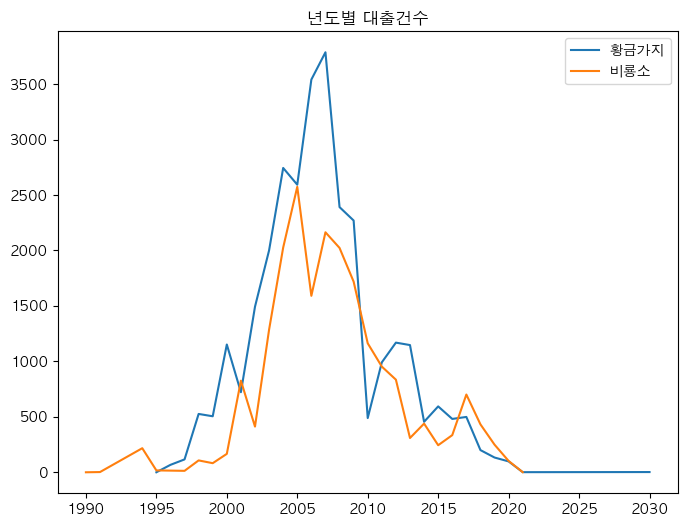

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

/var/folders/b8/ddg81r2x44g_7wx0yxbk2b2r0000gn/T/ipykernel_35749/3034620046.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


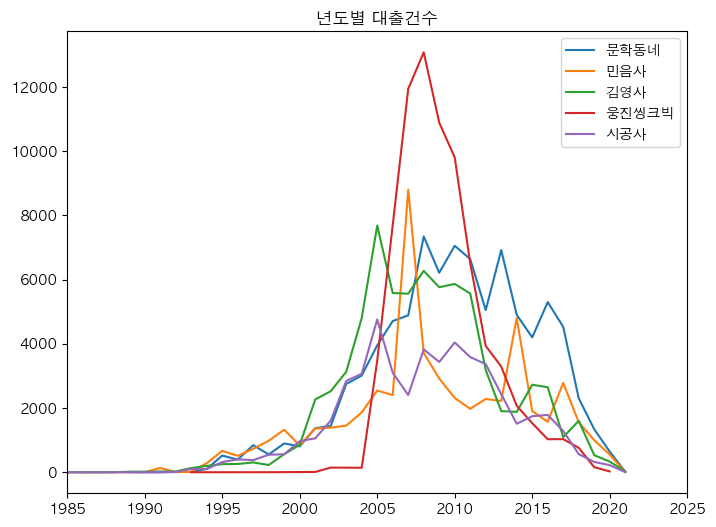

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

/var/folders/b8/ddg81r2x44g_7wx0yxbk2b2r0000gn/T/ipykernel_35749/654794341.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


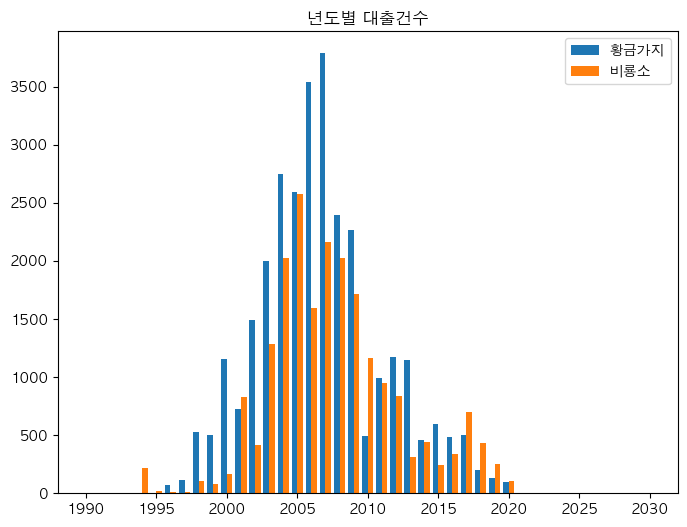

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

In [22]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

/var/folders/b8/ddg81r2x44g_7wx0yxbk2b2r0000gn/T/ipykernel_35749/434946793.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


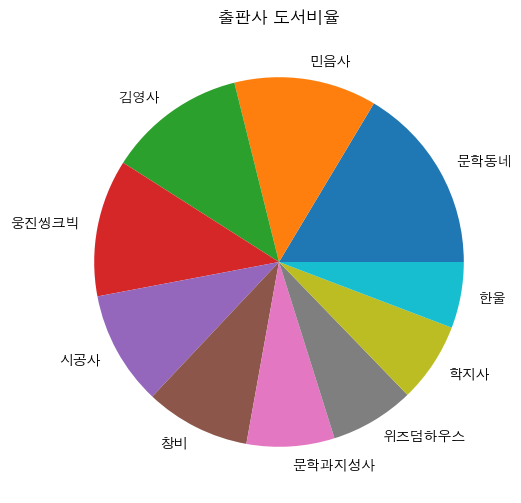

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서비율')
fig.show()

/var/folders/b8/ddg81r2x44g_7wx0yxbk2b2r0000gn/T/ipykernel_35749/4009653577.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


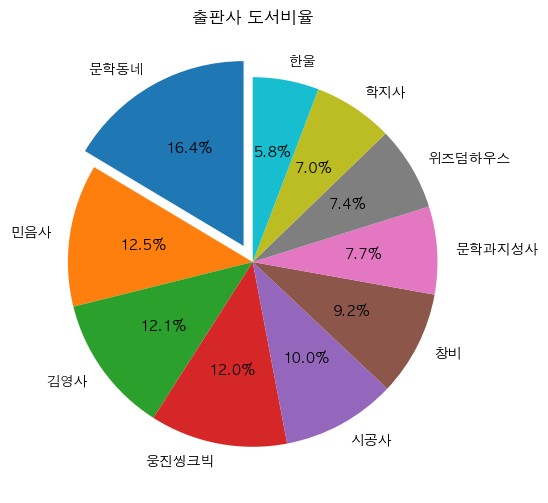

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels, startangle=90,
       autopct='%.1f%%', explode=[0.1]+[0]*9)
ax.set_title('출판사 도서비율')
fig.show()